<h1>Handwriting Recognization with Logistic Regression and using PCA<h1>

<h3>1. Step: Reduce the dimensions using PCA <h3>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [11]:
#Load data
mnist = fetch_openml('mnist_784')

In [12]:
#Check count of data
mnist.data.shape

(70000, 784)

In [18]:
#Define a function to show an image
def show_image(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()

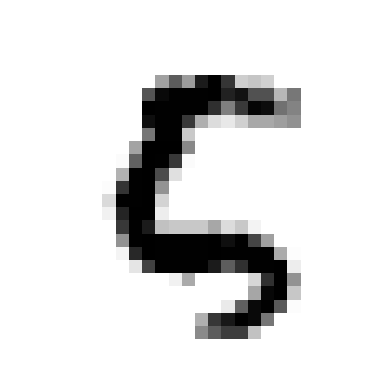

In [21]:
#Check the previous function
show_image(mnist.data, 2000)

In [22]:
#Split test and train (1/7 & 6/7)
train_img, test_img, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [23]:
#Check type of train & test data
type(train_img), type(test_img), type(train_label), type(test_label)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [24]:
#Take copy for test data (because orginal data will be transform)
test_img_copy = test_img.copy()

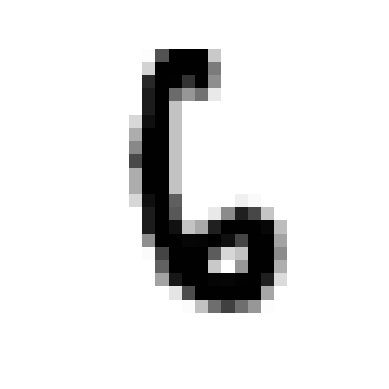

In [26]:
#Check test img copy
show_image(test_img_copy, 230)

In [27]:
#Scale the dataset (because of PCA)
scaler = StandardScaler()
#Scaler just traing set
scaler.fit(train_img)
#Transform both train & test data
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [29]:
#Variance is protected the ratio of 95% (optional!)
pca = PCA(.95)

In [30]:
#Apply PCA
pca.fit(train_img)

PCA(n_components=0.95)

In [31]:
#Check how many dimensions right now (previous was 784)
pca.n_components_

327

In [32]:
#Now transform the test & train data for 327 dimensions
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

<h3>2. Step: Apply the Logistic Regression <h3>

In [34]:
#lbfgs solver is more faster than default one
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)

In [35]:
#Train model
logisticRegr.fit(train_img, train_label)

LogisticRegression(max_iter=10000)

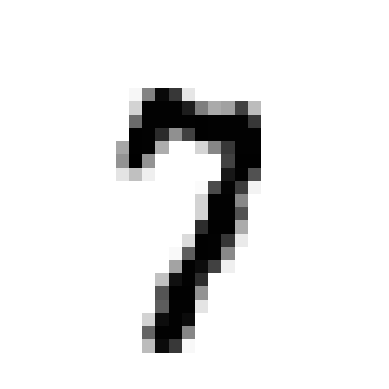

In [42]:
show_image(test_img_copy, 222)

In [45]:
#Let's apply the prediction process than observe accuracy
predict1 = logisticRegr.predict(test_img[222].reshape(1,-1))
print("Predicted: ", predict1)

Predicted:  ['7']


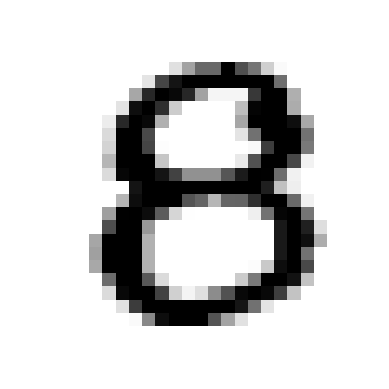

In [46]:
show_image(test_img_copy, 322)

In [47]:
predict2 = logisticRegr.predict(test_img[322].reshape(1,-1))
print("Predicted: ", predict2)

Predicted:  ['8']


In [48]:
#Check the accuracy
score = logisticRegr.score(test_img, test_label)
print("Accuracy: ", score)

Accuracy:  0.9187


In [49]:
#Let's see f1 score, recall and precision
from sklearn.metrics import classification_report
print(classification_report(test_label, logisticRegr.predict(test_img)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       996
           1       0.95      0.97      0.96      1141
           2       0.90      0.90      0.90      1040
           3       0.91      0.88      0.89      1013
           4       0.91      0.94      0.92       962
           5       0.88      0.88      0.88       863
           6       0.94      0.95      0.94       989
           7       0.93      0.92      0.92      1064
           8       0.89      0.89      0.89       963
           9       0.89      0.89      0.89       969

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

